In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

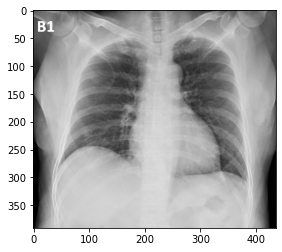

In [2]:
import keras
import tensorflow as tf

path_to_image="C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python A'dan Z'ye Derin Öğrenme (5)/covid_dataset_with_CNN/Covid19-dataset/test/Covid/094.png"
image = keras.utils.load_img(path_to_image)
plt.imshow(image)

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory("C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python A'dan Z'ye Derin Öğrenme (5)/covid_dataset_with_CNN/Covid19-dataset/train",
                                         target_size=(224,224),
                                         batch_size=10)

test_dataset = test.flow_from_directory("C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python A'dan Z'ye Derin Öğrenme (5)/covid_dataset_with_CNN/Covid19-dataset/test",
                                       target_size=(224,224),
                                       batch_size=10)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [5]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', padding='same', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [23]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#passing data to model

model_fit = model.fit(train_dataset,
                     steps_per_epoch=3,
                     epochs=10,
                     validation_data = test_dataset)

Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 1.2145 - accuracy: 0.2333 - val_loss: 1.0963 - val_accuracy: 0.3030
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.2416 - accuracy: 0.3333 - val_loss: 1.1148 - val_accuracy: 0.3030
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.1380 - accuracy: 0.2333 - val_loss: 1.1075 - val_accuracy: 0.3030
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 1.1202 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3030
Epoch 5/10
3/3 [==============================] - 4s 2s/step - loss: 1.1281 - accuracy: 0.2667 - val_loss: 1.0756 - val_accuracy: 0.3939
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 1.1167 - accuracy: 0.4000 - val_loss: 1.1040 - val_accuracy: 0.3939
Epoch 7/10
3/3 [==============================] - 4s 2s/step - loss: 1.1082 - accuracy: 0.3667 - val_loss: 1.0611 - val_accuracy: 0.4545
Epoch 8/10
3/3 [=========================

<font color="MediumSeaGreen">
Koronavirüs hastalığına dair bir veri setine CNN uygulayarak %90 oranında doğruluk değeri elde ettim. Aktivasyon fonksiyonları, filtre boyutları ve adım sayıları gibi parametreleri değiştirerek daha iyi bir doğruluk değeri elde ederseniz lütfen banada söyleyin :)
        
https://www.linkedin.com/in/raziye-dogan-1391bb242/ linkinden linkedin hesabım üzerinden yazabilirsiniz.
    
https://www.kaggle.com/code/ahmedaffan789/covid-19-image-classification-cnn-using-vgg-16/data linkinden çalışmada kullanılan veri setine ulaşabilirsiniz.